## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

## Read In Dataset

In [2]:
df = pd.read_csv('car_prices.csv')

## Analyzing Dataset

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [6]:
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [7]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [9]:
#Remove vin column
df = df.drop(['vin'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   state         558837 non-null  object 
 7   condition     547017 non-null  float64
 8   odometer      558743 non-null  float64
 9   color         558088 non-null  object 
 10  interior      558088 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558799 non-null  float64
 13  sellingprice  558825 non-null  float64
 14  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 64.0+ MB


In [10]:
#Getting the car age today
from datetime import date
date.today().year
df['vehicle_age']=date.today().year-df['year']
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,vehicle_age
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),9
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),9
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),10
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),9
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),10


# # Data Cleaning

In [11]:
print(df.make.unique())
print(df.make.nunique())

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']
96


In [13]:
# Drop manufacturers that are not in the US or prominent
# Define the values to remove
values_to_remove = ['Fisker', 'Lotus', 'Aston Martin', 'dot', 'airstream', 'suzuki', 'Suzuki',
                   'Saab', 'FIAT', 'Jaguar', 'Volvo']

# Remove rows with the specified values from the "state" column
df = df[~df['make'].isin(values_to_remove)]

# Now df_cleaned contains the DataFrame with the specified values removed from the "state" column
print(df.make.unique())
print(df.make.nunique())

['Kia' 'BMW' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'Chrysler' 'ford' 'Ferrari'
 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet' 'Bentley' 'chrysler'
 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury' 'HUMMER' 'landrover'
 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota' 'lexus' 'gmc truck'
 'honda' 'nissan' 'porsche' 'dodge' 'subaru' 'Oldsmobile' 'oldsmobile'
 'hyundai' 'jeep' 'Isuzu' 'dodge tk' 'Geo' 'acura' 'volkswagen' 'kia'
 'audi' 'Rolls-Royce' 'gmc' 'maserati' 'mazda tk' 'mercury' 'buick'
 'hyundai tk' 'mercedes-b' 'vw' 'Daewoo' 'chev truck' 'ford tk' 'plymouth'
 'Plymouth' 'ford truck' 'Tesla' 'Lamborghini']
85


In [14]:
def standardize_body_value(value):
    # If the value is NaN, return it as is
    if pd.isna(value):
        return value
    
    # If the value is not a string, convert it to a string
    if not isinstance(value, str):
        value = str(value)
    
    # Define a dictionary mapping variations to their standardized form
    variation_mapping = {
        'Kia': ['Kia', 'kia'],
        'Nissan': ['Nissan', 'nissan', 'Infiniti', 'mitsubishi', 'Mitsubishi'],
        'Honda': ['acura', 'honda', 'Honda', 'Acura'],
        'Mercedes': ['mercedes-b', 'mercedes', 'smart', 'Mercedes-Benz'],
        'Ford': ['Ford', 'ford', 'ford truck', 'ford tk', 'mercury', 'Mercury', 'land rover', 'landrover', 'Land Rover', 'Lincoln', 'lincoln'],
        'Hyundai': ['hyundai tk', 'Hyundai'],
        'Chrysler': ['Chrysler', 'Ferrari', 'Ram', 'plymouth', 'Plymouth', 'maserati', 'Maserati', 'jeep', 'Jeep', 'chrysler'],
        'BMW': ['BMW', 'Rolls-Royce', 'bmw', 'MINI'],
        'Dodge': ['dodge tk', 'Dodge'],
        'Toyota': ['Geo', 'Isuzu', 'lexus', 'Lexus', 'toyota', 'Scion', 'Toyota', 'Subaru'],
        'Tesla': ['Tesla'],
        'Volkswagen': ['Volkswagen', 'vw', 'porsche', 'Porsche', 'Bentley'],
        'Chevrolet': ['Oldsmobile', 'oldsmobile' 'Chevrolet', 'chevrolet', 'chev truck', 'Daewoo', 'GMC', 'buick', 'Buick', 'gmc', 'gmc truck', 'cadillac', 'Cadillac', 'HUMMER', 'Saturn', 'pontiac', 'Pontiac'],
        'Audi': ['Audi', 'Lamborghini', 'audi'],
        'Mazda': ['mazda tk', 'mazda', 'Mazda']
        
    }
    
    # Iterate over variation_mapping to find a match for the value
    for standard_value, variations in variation_mapping.items():
        # Convert both value and variations to lowercase for case-insensitive comparison
        if value.lower() in [variation.lower() for variation in variations]:
            return standard_value
    
    # If no match is found, return the original value
    return value

# Apply the function to standardize the body values
df['make'] = df['make'].apply(standardize_body_value)

# Verify changes
print("Unique values after modification:", df['make'].unique())
print("Number of unique values after modification:", df['make'].nunique())

Unique values after modification: ['Kia' 'BMW' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Honda' 'Toyota'
 'Chrysler' 'Mercedes' 'Mazda' 'Volkswagen' nan 'Dodge' 'Tesla']
Number of unique values after modification: 15


In [15]:
print(df.state.unique())
print(df.state.nunique())

['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'or' 'pr' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' '3vwd17aj4fm201708' 'ns'
 '3vwd17aj2fm258506' '3vwd17aj3fm276741' '3vwd17aj2fm285365'
 '3vwd17aj0fm227318' '3vwd17aj6fm218641' '3vwd17aj7fm223475'
 '3vwd17aj5fm297123' '3vwd17aj5fm219943' '3vwd17aj9fm219766'
 '3vwd17aj3fm259017' '3vwd17aj5fm206111' '3vwd17aj5fm273601'
 '3vwd17aj5fm221322' '3vwd17aj5fm268964' '3vwd17aj6fm231972'
 '3vwd17aj7fm222388' '3vwd17aj7fm218440' '3vwd17ajxfm315938'
 '3vwd17aj7fm229552' '3vwd17aj8fm298895' '3vwd17aj4fm236636'
 '3vwd17aj5fm225953' '3vwd17aj7fm326640' '3vwd17aj8fm239622'
 '3vwd17aj2fm261566']
64


In [16]:
# Define the values to remove
values_to_remove = ['3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365', '3vwd17aj0fm227318', '3vwd17aj6fm218641', 
                    '3vwd17aj7fm223475', '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766', '3vwd17aj3fm259017', 
                    '3vwd17aj5fm206111', '3vwd17aj5fm273601', '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972', 
                    '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938', '3vwd17aj7fm229552', '3vwd17aj8fm298895', 
                    '3vwd17aj4fm236636', '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622', '3vwd17aj2fm261566',
                    '3vwd17aj4fm201708']

# Remove rows with the specified values from the "state" column
new_df = df[~df['state'].isin(values_to_remove)]

# Now df_cleaned contains the DataFrame with the specified values removed from the "state" column


In [17]:
print(new_df.state.unique())
print(new_df.state.nunique())

['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'or' 'pr' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' 'ns']
38


In [18]:
print(new_df.body.unique())
print(new_df.body.nunique())

['SUV' 'Sedan' 'Convertible' 'Coupe' 'Hatchback' 'Crew Cab' 'G Coupe'
 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Wagon' 'Minivan' nan 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'SuperCrew'
 'CTS Coupe' 'Extended Cab' 'E-Series Van' 'SuperCab' 'Regular Cab'
 'G Convertible' 'Koup' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Xtracab' 'Q60 Convertible' 'CTS Wagon' 'convertible'
 'G37 Coupe' 'Mega Cab' 'Cab Plus 4' 'Q60 Coupe' 'Cab Plus'
 'Beetle Convertible' 'TSX Sport Wagon' 'Promaster Cargo Van'
 'GranTurismo Convertible' 'CTS-V Wagon' 'Ram Van' 'minivan' 'suv'
 'Transit Van' 'van' 'regular-cab' 'g sedan' 'g coupe' 'hatchback'
 'king cab' 'supercrew' 'g convertible' 'coupe' 'crew cab' 'wagon'
 'double cab' 'e-series van' 'regular cab' 'quad cab' 'g37 convertible'
 'supercab' 'extended cab' 'crewmax cab' 'genesis coupe' 'access cab'
 'mega cab' 'xtracab' 'beetle convertible' 'cts coupe' 'koup' 'club cab'
 'elantra coupe' 'q60 coupe' 'cts-v coupe' 'tran

In [19]:
def standardize_body_value(value):
    # If the value is NaN, return it as is
    if pd.isna(value):
        return value
    
    # If the value is not a string, convert it to a string
    if not isinstance(value, str):
        value = str(value)
    
    # Define a dictionary mapping variations to their standardized form
    variation_mapping = {
        'SUV': ['suv', 'SUV'],
        'Sedan': ['sedan', 'G Sedan', 'sedan', 'regular-cab', 'CTS Coupe', 'G Coupe', 'CTS-V Coupe', 'G37 Coupe'],
        'Convertible': ['convertible', 'G Convertible', 'Q60 Convertible', 'beetle convertible', 'Q60 Coupe', 'GranTurismo Convertible', 'CTS-V Wagon', 'granturismo convertible', 'G37 Convertible', 'g37 convertible', 'transit van', 'Navitgation'],
        'Coupe': ['coupe', 'g coupe', 'koup', 'CTS Coupe', 'G Coupe', 'CTS-V Coupe', 'G37 Coupe', 'Elantra Coupe', 'Genesis Coupe', 'g37 convertible', 'genesis coupe', 'elantra coupe'],
        'Wagon': ['wagon', 'CTS Wagon', 'TSX Sport Wagon'],
        'Hatchback': ['hatchback'],
        'Minivan': ['minivan', 'Promaster Cargo Van'],
        'Cab': ['Crew Cab', 'CrewMax Cab', 'Access Cab', 'Double Cab', 'King Cab', 'SuperCrew', 'Extended Cab', 'SuperCab', 'Regular Cab', 'Quad Cab', 'Mega Cab', 'Cab Plus', 'Xtracab', 'Cab Plus 4', 'Club Cab'],
        'Van': ['Van', 'E-Series Van', 'Ram Van', 'Transit Van', 'van', 'e-series van', 'nan']
    }
    
    # Iterate over variation_mapping to find a match for the value
    for standard_value, variations in variation_mapping.items():
        # Convert both value and variations to lowercase for case-insensitive comparison
        if value.lower() in [variation.lower() for variation in variations]:
            return standard_value
    
    # If no match is found, return the original value
    return value

# Apply the function to standardize the body values
new_df['body'] = new_df['body'].apply(standardize_body_value)

# Verify changes
print("Unique values after modification:", new_df['body'].unique())
print("Number of unique values after modification:", new_df['body'].nunique())


Unique values after modification: ['SUV' 'Sedan' 'Convertible' 'Coupe' 'Hatchback' 'Cab' 'Wagon' 'Minivan'
 nan 'Van']
Number of unique values after modification: 9


C:\Users\rseal\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
print(new_df['body'].unique())
print(new_df['body'].nunique())

['SUV' 'Sedan' 'Convertible' 'Coupe' 'Hatchback' 'Cab' 'Wagon' 'Minivan'
 nan 'Van']
9


## EDA 

In [21]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,551139.0,2010.061834,3.953549,1982.0,2008.0,2012.0,2013.0,2015.0
condition,539631.0,30.698472,13.398632,1.0,23.0,35.0,42.0,49.0
odometer,551047.0,68207.305996,53383.477939,1.0,28363.5,52082.0,98857.0,999999.0
mmr,551127.0,13798.810528,9638.619536,25.0,7200.0,12300.0,18350.0,182000.0
sellingprice,551127.0,13640.520083,9710.296677,1.0,7000.0,12200.0,18200.0,230000.0
vehicle_age,551139.0,13.938166,3.953549,9.0,11.0,12.0,16.0,42.0


In [22]:
#Separating Numerical and Categorical variables
cat_cols = new_df.select_dtypes(include=['object']).columns
num_cols = new_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['make', 'model', 'trim', 'body', 'transmission', 'state', 'color',
       'interior', 'seller', 'saledate'],
      dtype='object')
Numerical Variables:
['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'vehicle_age']


year
Skew : -1.2


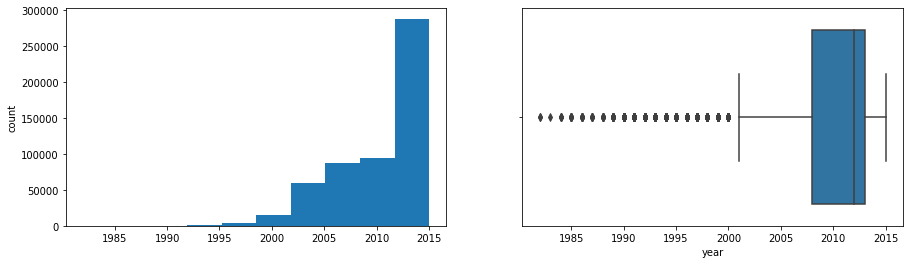

condition
Skew : -0.84


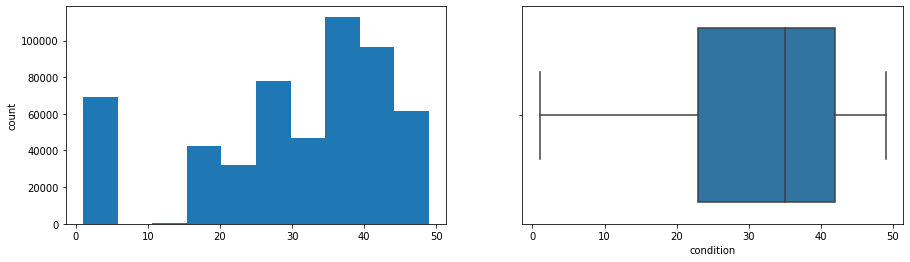

odometer
Skew : 1.85


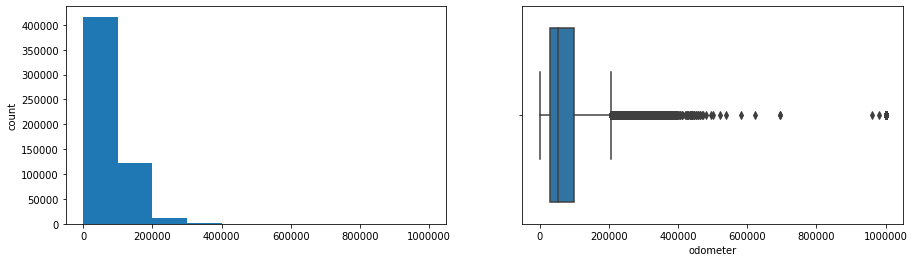

mmr
Skew : 2.0


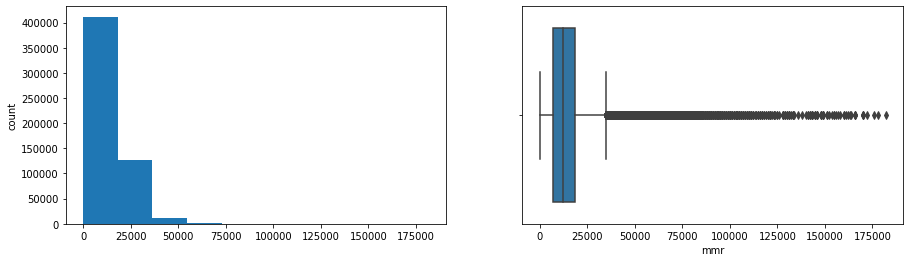

sellingprice
Skew : 1.95


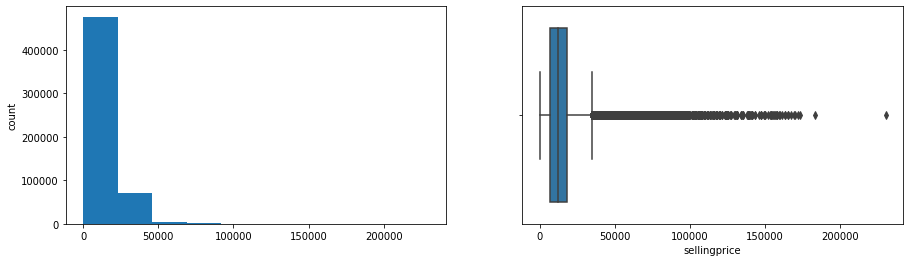

vehicle_age
Skew : 1.2


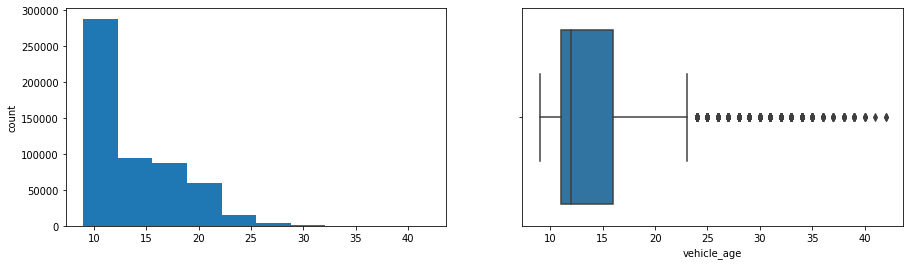

In [23]:
#Univaritave Analysis
for col in num_cols:
    print(col)
    print('Skew :', round(new_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

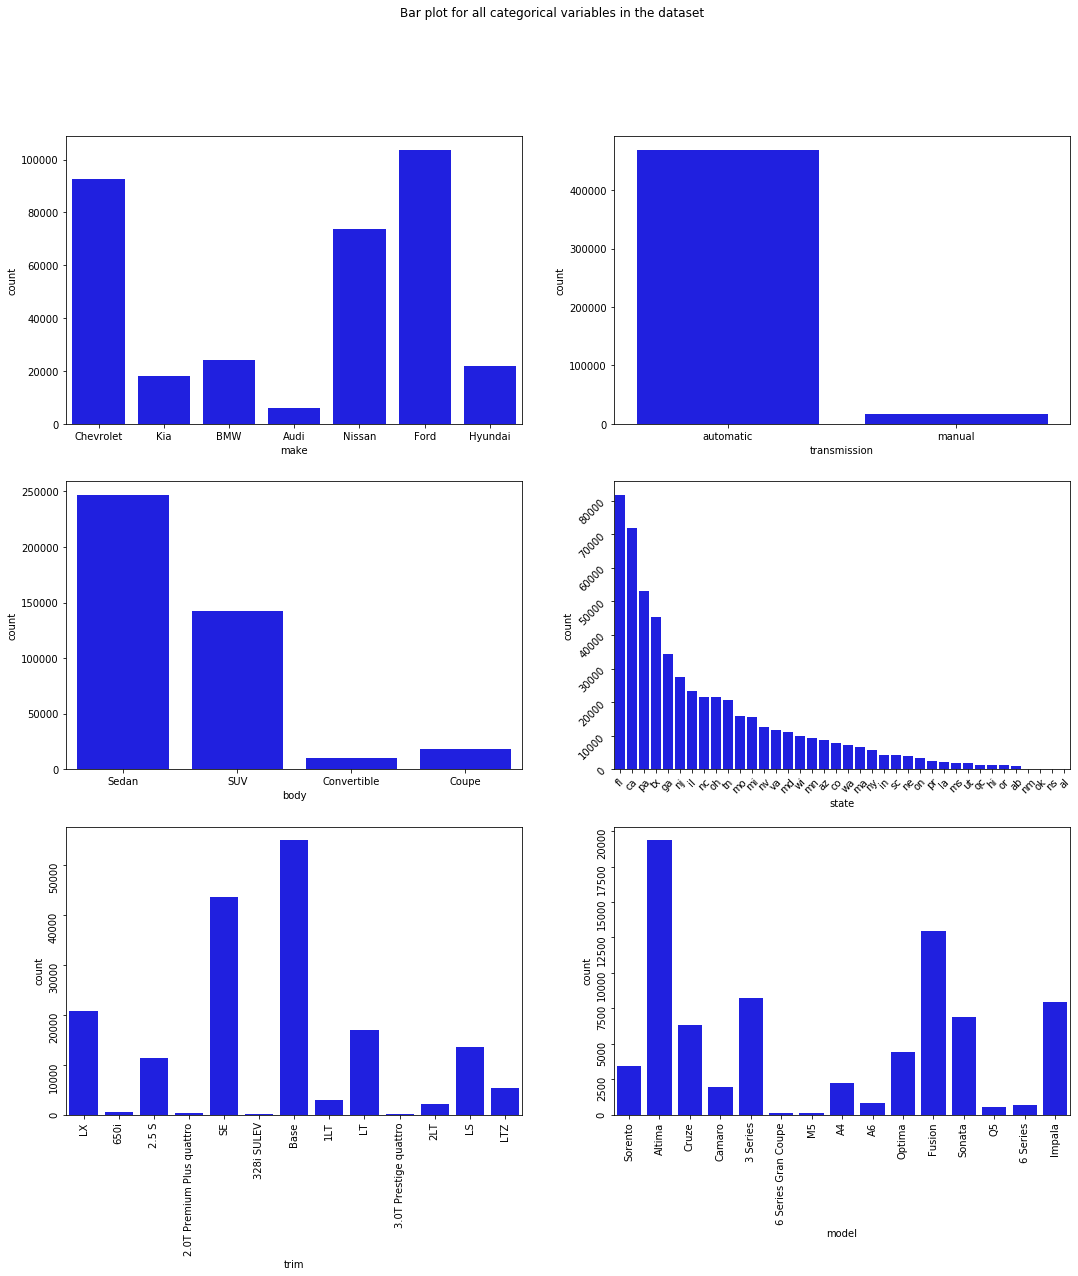

In [24]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'make', data = new_df, color = 'blue', 
              order = new_df['make'].head(20).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'transmission', data = new_df, color = 'blue', 
              order = new_df['transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'body', data = new_df, color = 'blue', 
              order = new_df['body'].head(20).value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'state', data = new_df, color = 'blue', 
              order = new_df['state'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'trim', data = new_df, color = 'blue', 
              order = new_df['trim'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'model', data = new_df, color = 'blue', 
              order = new_df['model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [25]:
# Function for log transformation of the column
def log_transform(new_df,col):
    for colname in col:
        if (new_df[colname] == 1.0).all():
            new_df[colname + '_log'] = np.log(new_df[colname]+1)
        else:
            new_df[colname + '_log'] = np.log(new_df[colname])
    new_df.info()

In [26]:
log_transform(new_df,['odometer','mmr','sellingprice','vehicle_age'])

C:\Users\rseal\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
Int64Index: 551139 entries, 0 to 558836
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              551139 non-null  int64  
 1   make              540838 non-null  object 
 2   model             540740 non-null  object 
 3   trim              540490 non-null  object 
 4   body              537951 non-null  object 
 5   transmission      486726 non-null  object 
 6   state             551139 non-null  object 
 7   condition         539631 non-null  float64
 8   odometer          551047 non-null  float64
 9   color             550399 non-null  object 
 10  interior          550399 non-null  object 
 11  seller            551139 non-null  object 
 12  mmr               551127 non-null  float64
 13  sellingprice      551127 non-null  float64
 14  saledate          551127 non-null  object 
 15  vehicle_age       551139 non-null  int64  
 16  odometer_log      55

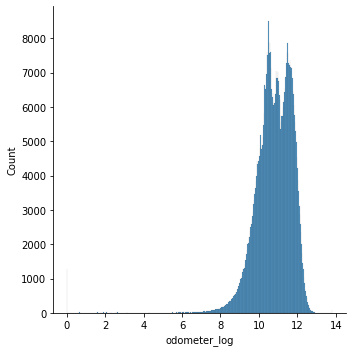

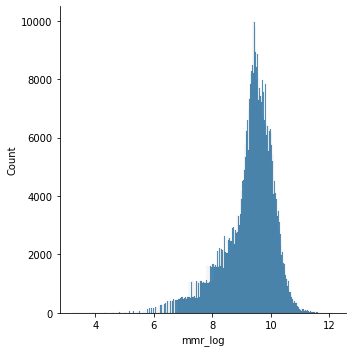

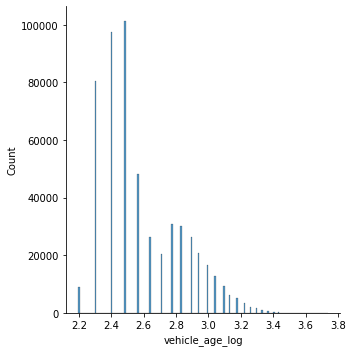

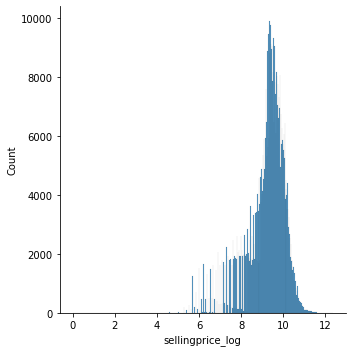

In [27]:
#Log transformation of the feature odometer
sns.displot(new_df["odometer_log"])#, axlabel="odometer_log");
sns.displot(new_df["mmr_log"])
sns.displot(new_df["vehicle_age_log"])
sns.displot(new_df["sellingprice_log"])

<Figure size 936x1224 with 0 Axes>

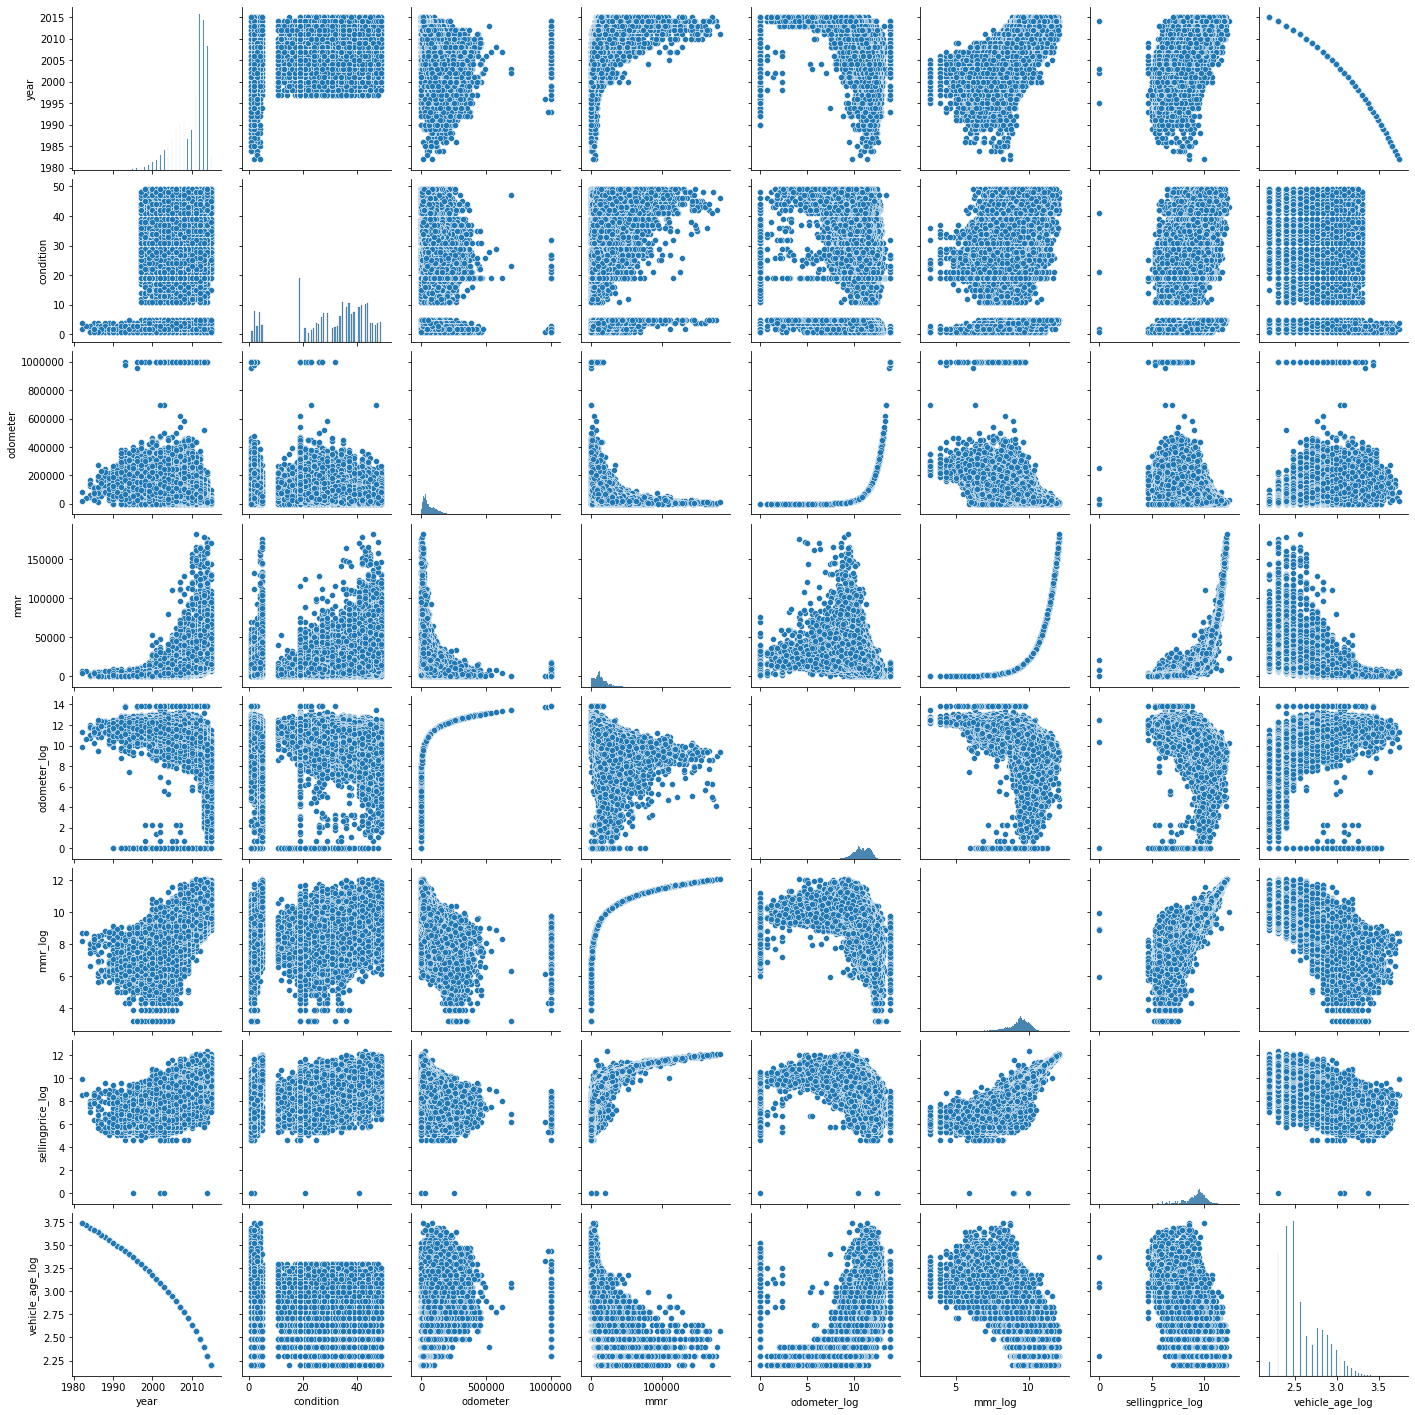

In [28]:
#Bivariate Analysis
plt.figure(figsize=(13,17))
sns.pairplot(data=new_df.drop(['vehicle_age','sellingprice'],axis=1))
plt.show()

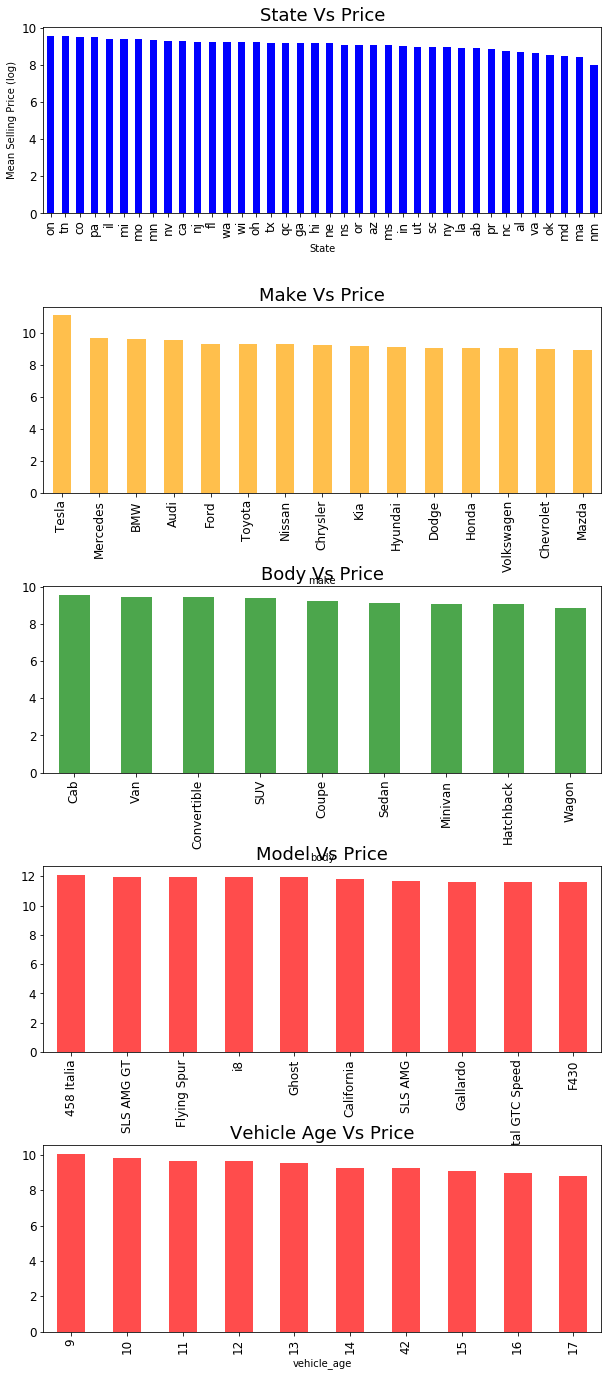

In [29]:
#fig, axarr = plt.subplots(4, figsize=(12, 18))
#df.groupby('state')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
#axarr[0].set_title("State Vs Price", fontsize=18)
#df.groupby('transmission')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
#axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
#df.groupby('make')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
#axarr[1].set_title("Make Vs Price", fontsize=18)
#df.groupby('body')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
#axarr[2].set_title("Body Vs Price", fontsize=18)
#df.groupby('model')['sellingprice_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
#axarr[3].set_title("Model Vs Price", fontsize=18)
#plt.subplots_adjust(hspace=1.0)
#plt.subplots_adjust(wspace=.5)
#sns.despine()

# Create a single subplot

# Create a figure and a grid of subplots
fig, axarr = plt.subplots(5, 1, figsize=(10, 24))  # 5 subplots stacked vertically

# Group by state and plot
new_df.groupby('state')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=12, color='blue')
axarr[0].set_title("State Vs Price", fontsize=18)
axarr[0].set_xlabel('State')
axarr[0].set_ylabel('Mean Selling Price (log)')

# Group by make and plot
new_df.groupby('make')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=12, color='orange', alpha=0.7)
axarr[1].set_title("Make Vs Price", fontsize=18)

# Group by body and plot
new_df.groupby('body')['sellingprice_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2], fontsize=12, color='green', alpha=0.7)
axarr[2].set_title("Body Vs Price", fontsize=18)

# Group by model and plot
new_df.groupby('model')['sellingprice_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3], fontsize=12, color='red', alpha=0.7)
axarr[3].set_title("Model Vs Price", fontsize=18)

# Group by model and plot
new_df.groupby('vehicle_age')['sellingprice_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[4], fontsize=12, color='red', alpha=0.7)
axarr[4].set_title("Vehicle Age Vs Price", fontsize=18)

# Adjust layout
plt.subplots_adjust(hspace=0.5)

plt.show()

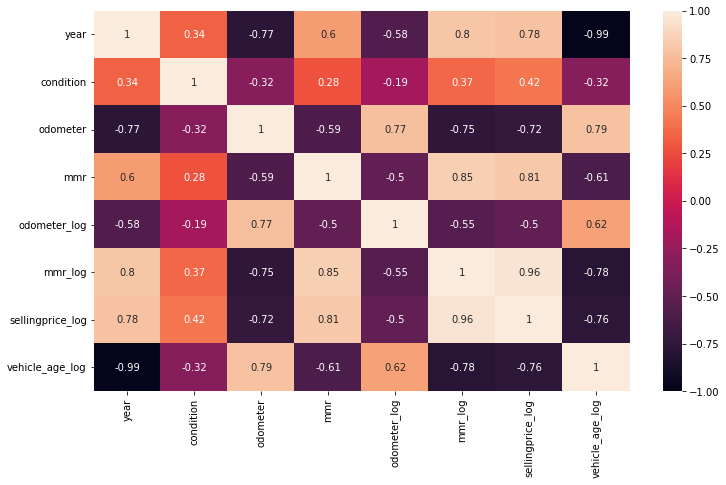

In [30]:
# Multivariate Analysis
plt.figure(figsize=(12, 7))
sns.heatmap(new_df.drop(['vehicle_age','sellingprice'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()